### Read Data

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('Pre-Processed-data.csv')
df.head()

,Unnamed: 0,datesk,Item Name,Date,price,Item_Name,Percent,year,month,day
0,296,20110101,Sponge Gourd,2011-01-01 00:00:00,32.0,294,0.673744,2011,1,1
1,22311,20110309,Berry Southafrica,2011-09-03 00:00:00,0.0,45,0.104917,2011,3,9
2,22312,20110309,Baby corn cleaned,2011-09-03 00:00:00,56.0,21,0.048937,2011,3,9
3,22313,20110309,Baby corn,2011-09-03 00:00:00,14.0,20,0.046607,2011,3,9
4,22314,20110309,Chillies Bajji yagani,2011-09-03 00:00:00,0.0,88,0.205171,2011,3,9


### Split Data to [ train , test ]

In [43]:
df.shape

(551948, 10)

In [11]:
X = df[ ['Item_Name' , 'Percent' , 'year' , 'month' , 'day' ] ]
y = df['price'].to_numpy().reshape(-1,1).ravel()

In [21]:
from sklearn.model_selection import train_test_split

xtrain , xtest , ytrain , ytest = train_test_split(X,y ,test_size=.2 , shuffle=True , random_state=43 )

### Create Models and Evaluate

In [22]:
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(n_estimators=50)

In [23]:
rf_model.fit(xtrain,ytrain)

RandomForestRegressor(n_estimators=50)

In [56]:
predictions = rf_model.predict(xtest)

In [57]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


mse = mean_squared_error(ytest, predictions)
mae = mean_absolute_error(ytest, predictions)
r2 = r2_score(ytest, predictions)


print("Mean Squared Error: ", round(mse , 3) )
print("Mean Absolute Error: ", round(mae , 3))
print("R-squared: ", round(r2 , 3))

Mean Squared Error:  40.405
Mean Absolute Error:  0.969
R-squared:  0.991


In [58]:
df_eva = pd.DataFrame({'ytest': ytest , 'predictions' : predictions })
df_eva.head(10)

,ytest,predictions
0,0.0,0.00
1,13.0,14.58
2,0.0,0.00
3,0.0,0.00
4,0.0,0.00
5,0.0,0.00
6,176.0,176.00
7,0.0,0.00
8,0.0,0.00
9,70.0,70.00


In [64]:
predictions.shape

(110390,)

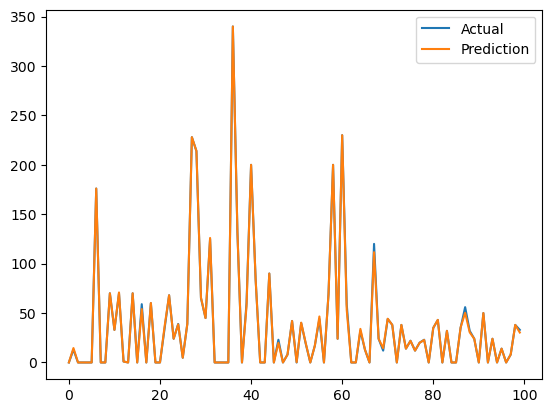

In [79]:
import matplotlib.pyplot as plt

_1 = 100
_ = [i for i in range(_1)]

plt.plot(_,ytest[:_1] )
plt.plot(_,predictions[:_1])


plt.legend(['Actual', 'Prediction'], loc='upper right')
plt.show()

In [80]:
predictions = rf_model.predict(xtrain)

In [81]:
mse = mean_squared_error(ytrain, predictions)
mae = mean_absolute_error(ytrain, predictions)
r2 = r2_score(ytrain, predictions)


print("Mean Squared Error: ", round(mse , 3) )
print("Mean Absolute Error: ", round(mae , 3))
print("R-squared: ", round(r2 , 3))

Mean Squared Error:  5.985
Mean Absolute Error:  0.355
R-squared:  0.999


In [82]:
df_eva2 = pd.DataFrame({'ytrain': ytrain , 'predictions' : predictions })
df_eva2.head(10)

,ytrain,predictions
0,60.0,60.52
1,58.0,58.46
2,49.0,49.30
3,44.0,44.00
4,98.0,98.00
5,228.0,228.00
6,30.0,30.00
7,0.0,0.00
8,18.0,18.50
9,190.0,190.00


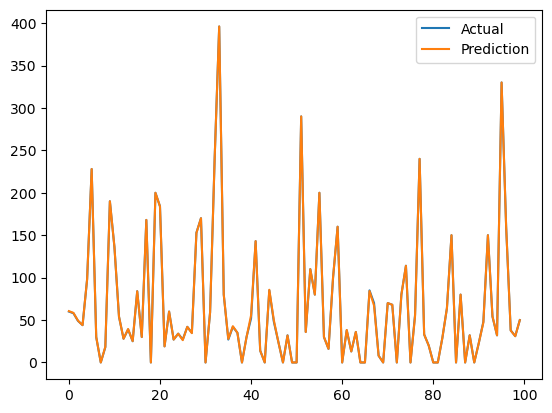

In [83]:
_1 = 100
_ = [i for i in range(_1)]

plt.plot(_,ytrain[:_1] )
plt.plot(_,predictions[:_1])


plt.legend(['Actual', 'Prediction'], loc='upper right')
plt.show()

### Save Model

In [85]:
import joblib

file_path = 'rf_model.pkl'
joblib.dump(rf_model, file_path)

['rf_model.pkl']

### Load Model and Encoder 

In [86]:
import joblib

file_path = 'encoder.pkl'

loaded_encoder = joblib.load(file_path)


file_path = 'rf_model.pkl'

loaded_model = joblib.load(file_path)

### Make Predict

In [146]:
label = 328
year = 2023
month = 9
day = 30
actual_cost = 60

In [147]:
_data = pd.DataFrame([])

_data['Item_Name'] = [label]
_data['Percent'] = [float(df[df['Item_Name'] == label]['Percent'].values[0])]
_data['year'] = [year]
_data['month'] = [month]
_data['day'] = [day]

_data.head()

,Item_Name,Percent,year,month,day
0,328,0.76473,2023,9,30


In [148]:
f_or_v = loaded_encoder.classes_[label]
print(f_or_v)

knol-khol


In [152]:
predictions_cost = loaded_model.predict(_data)[0]

In [156]:
abs_delta = abs(predictions_cost-actual_cost)
print(f'Actual : {actual_cost}')
print(f'Prediction : {predictions_cost}')
print(f'Abs Delta : {round(abs_delta,4)}')

Actual : 60
Prediction : 65.12
Abs Delta : 5.12
